In [1]:
import pybamm
import numpy as np
import matplotlib.pyplot as plt
from os.path import join
from src import ContactLens, Simulation, get_parameters, get_curing_time

In [2]:
model = ContactLens()

In [3]:
param = get_parameters()
param2 = get_parameters("Gao2018 isothermal")

parameters = [param, param2]

In [4]:
solutions = []
for param in parameters:
    sim = pybamm.Simulation(model, parameter_values=param)
    t = np.linspace(0, 400, 1000)
    solution = sim.solve(t)
    solutions.append(solution)

In [5]:
pybamm.dynamic_plot(
    solutions,
    output_variables=[
        "Temperature [K]",
        "Degree of polimerisation",
        "Rate of polimerisation [s-1]",
        "Averaged temperature [K]",
        "Averaged degree of polimerisation",
        "Averaged rate of polimerisation [s-1]"
        # "UV intensity [W.m-2]",
    ],
    labels=[
        "temperature dependent",
        "isothermal",
    ]
)

interactive(children=(FloatSlider(value=0.0, description='t', max=400.0, step=4.0), Output()), _dom_classes=('…

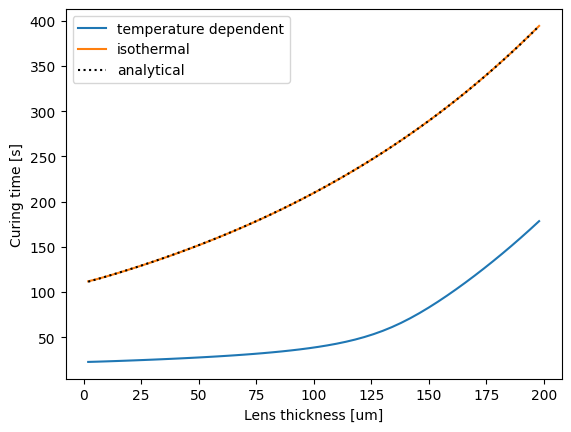

In [6]:
z = solution["z [um]"].entries[:, 0]
kI = param2["Radiation absorbance [m-1]"]
I0 = param2["UV boundary intensity [W.m-2]"]
q = param2["Reaction rate [m.s-1.W.-0.5]"]
for solution in solutions:
    t_c = get_curing_time(solution)
    plt.plot(z, t_c)
plt.plot(z, - np.log(1 - 0.95) / (I0 ** 0.5 * q) * np.exp(0.5 * kI * z * 1e-6), "k:")
plt.xlabel("Lens thickness [um]")
plt.ylabel("Curing time [s]")
plt.legend(["temperature dependent", "isothermal", "analytical"])
plt.savefig(join("fig", "curing_time.png"), dpi=300)

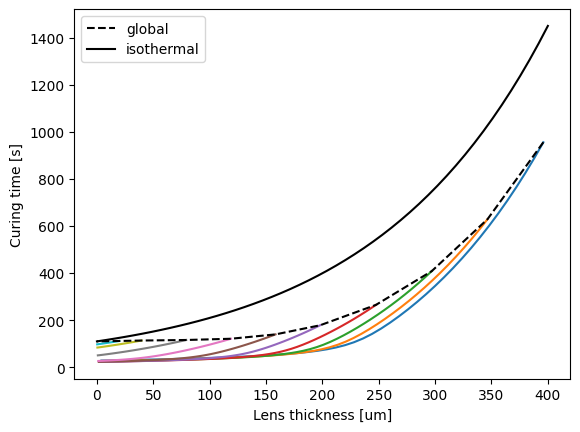

In [7]:
solutions = []
zs = []
t_cs = []
scales = [0.1, 0.2, 0.4, 0.6, 0.8, 1, 1.25, 1.5, 1.75, 2]
z_end = []
t_c_end = []
for scale in reversed(scales):
    param = get_parameters()
    param["Lens thickness [m]"] *= scale
    sim = Simulation(model, parameter_values=param)
    t = np.linspace(0, 1800, 10000)
    solution = sim.solve(t)
    solutions.append(solution)
    t_c = get_curing_time(solution)
    t_cs.append(t_c)
    zs.append(solution["z [um]"].entries[:, 0])
    z_end.append(solution["z [um]"].entries[-1, -1])
    t_c_end.append(t_c[-1])

z_end += [0]
t_c_end += [- np.log(1 - 0.95) / (I0 ** 0.5 * q)]

for z, t_c, scale in zip(zs, t_cs, scales):
    plt.plot(z, t_c) #, label=f"{scale}")
plt.plot(z_end, t_c_end, "k--", label="global")
plt.plot(np.linspace(0, 400), - np.log(1 - 0.95) / (I0 ** 0.5 * q) * np.exp(0.5 * kI * np.linspace(0, 4e-4)), "k-", label="isothermal")
plt.xlabel("Lens thickness [um]")
plt.ylabel("Curing time [s]")
plt.legend()
plt.savefig(join("fig", "curing_time_vs_L.png"), dpi=300)

In [8]:
t_c_end

[955.9078168231097,
 629.2662796106972,
 408.43010246442867,
 265.04573653579075,
 178.44102150229924,
 139.67120560310727,
 121.14767483385796,
 115.88940018154162,
 113.59108309131726,
 111.69643952090392,
 110.00221759371045]

In [9]:
solutions[-1].plot([
    "Temperature [K]",
    "Degree of polimerisation",
    "Rate of polimerisation [s-1]",
    "Averaged temperature [K]",
    "Averaged degree of polimerisation",
    "Averaged rate of polimerisation [s-1]"
])

interactive(children=(FloatSlider(value=0.0, description='t', max=1800.0, step=18.0), Output()), _dom_classes=…